<a href="https://colab.research.google.com/github/Vrushali9-collab/statsmodels-linear-regression/blob/main/SVMDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Support Vector MAchine**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df= pd.read_csv('/content/cell_samples.csv')

In [36]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

## **Distribution of classes**

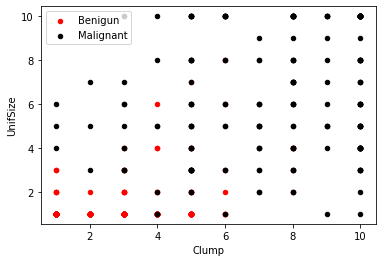

In [39]:
benigun_df=df[df['Class']==2][0:200]
malignant_df=df[df['Class']==4][0:200]

axes=benigun_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Benigun')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='black',label='Malignant',ax=axes)

## **Identify Unwanted Row**

In [41]:

df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]

df['BareNuc']=df['BareNuc'].astype('int')

df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [47]:
df.columns

feature_df=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#cell of 100 rows and 11 col
#picked 9 col out of 11

#independent var
X=np.asarray(feature_df)

#dependent var
Y=np.asarray(df['Class'])

In [48]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [49]:
Y[0:5]

array([2, 2, 2, 2, 2])

## **Divide the data into train and test**

In [51]:
#train(X,Y)
#test(X,Y)
#X is 2d array
#Y is 1d array
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=4)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(546, 9) (137, 9) (546,) (137,)


### **Building the model**

In [59]:
from sklearn import svm
Classifier=svm.SVC(kernel='linear',gamma='auto', C=2)
Classifier.fit(X_train,Y_train)


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_predict=Classifier.predict(X_test)


### **Result**

In [63]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_predict))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

